In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image
from pathlib import Path  
from PIL import Image  
from wordcloud import WordCloud, ImageColorGenerator  
import jieba
from collections import Counter
import matplotlib.font_manager as fm

In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei']

font_path = fm.findfont(fm.FontProperties(family='SimHei'))

In [25]:
file_path='./data/范特西fantasy.csv'

In [26]:
df = pd.read_csv(file_path)
df

,user_name,star,comment_time,vote,short
0,锐利修蕊,5.0,2017-10-07 10:14:51,2540,周杰伦的第二张真是牛逼到没朋友
1,素手纤纤,5.0,2007-10-08 04:08:36,1824,十年来我只给两张专辑打满分，这是其一。
2,郁程,5.0,2007-12-04 10:44:27,1236,划时空的专辑音乐史上的里程碑专辑奇迹
3,DeerColin,5.0,2012-11-16 19:11:09,433,第二张专辑依旧很高的品质，甚至可以说是他最经典的专辑（没有之一）。周杰伦和方文山这对完美组合...
4,九亿少男的梦,5.0,2015-06-19 22:25:38,381,我对历史一窍不通，但是我知道古巴比伦王颁布了汉摩拉比宝典。
...,...,...,...,...,...
215,大科学,5.0,2013-06-19 18:51:55,0,从不同政府层次看，越是较低一级政府越要强化公共服务职能，淡化经济职能。这是地方政府职能转变的...
216,马达[mǎ dá],4.0,2013-06-26 21:39:33,0,高中时候听的。貌似还有一张卡带在家里.......
217,jeffchuwei,5.0,2010-03-09 17:56:12,1,没法说的一张专辑周杰伦只存在于这张专辑中
218,芥末蘸酱,5.0,2009-09-30 15:07:36,0,开始接触流行音乐。


In [27]:
df_date = df.copy()
df_date['comment_time']=pd.to_datetime(df_date['comment_time']).dt.strftime('%Y')
month_count=df_date.groupby(['comment_time'])['comment_time'].count()
month_count.index

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='comment_time')

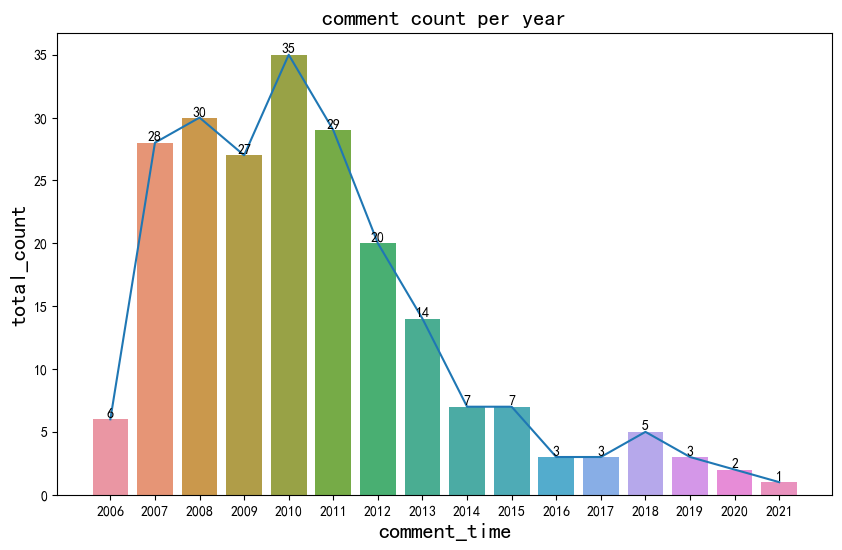

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('comment count per year', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('total_count', fontsize=16)
ax1 = sns.barplot(x=month_count.index, y = list(month_count))
ax1.tick_params(axis='y')
ax1.bar_label(ax1.containers[0])
ax2 = sns.lineplot(x=month_count.index, y = list(month_count))
ax2.tick_params(axis='y')

In [29]:
df_star = df.groupby(['star'])['star'].count()
df_star

star
1.0      1
3.0      2
4.0     39
5.0    169
Name: star, dtype: int64

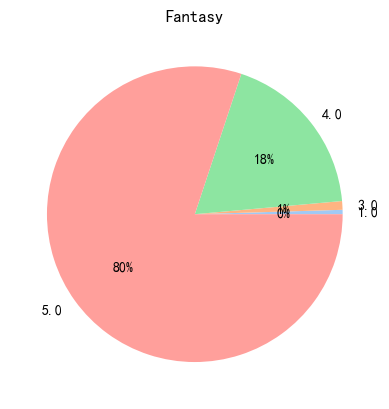

In [30]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_star, labels = df_star.index.tolist(), colors = colors, autopct='%.0f%%')
plt.title("Fantasy")
plt.show()

In [31]:
df_date.sort_values(by=['vote'],ascending=False).iloc[:10]

,user_name,star,comment_time,vote,short
0,锐利修蕊,5.0,2017,2540,周杰伦的第二张真是牛逼到没朋友
1,素手纤纤,5.0,2007,1824,十年来我只给两张专辑打满分，这是其一。
2,郁程,5.0,2007,1236,划时空的专辑音乐史上的里程碑专辑奇迹
3,DeerColin,5.0,2012,433,第二张专辑依旧很高的品质，甚至可以说是他最经典的专辑（没有之一）。周杰伦和方文山这对完美组合...
4,九亿少男的梦,5.0,2015,381,我对历史一窍不通，但是我知道古巴比伦王颁布了汉摩拉比宝典。
5,Bill,5.0,2007,253,首首经典难以超越的高度且不仅仅只对周杰伦而言
7,一只麦麦,5.0,2010,203,准确说是从这张开始爱上周杰伦的，每每听到爱在西元前前奏响起眼泪都要夺眶而出，仿佛回到初中午休...
8,文泽尔,4.0,2007,146,这其实应该是周杰伦最好的一张专辑了吧
11,V.Dunham,5.0,2015,118,他永远不会泯然众人矣的原因就在于他本来就不是众人。
6,tlmgt,4.0,2011,100,现在觉得这张的整体性上做得并不是那么好。前三张最爱的还是《八度空间》无疑。


In [32]:
top5=df_date.sort_values(by=['vote'],ascending=False).iloc[:5].reset_index()
stopwords = set()
content = [line.strip() for line in open('cn_stopwords.txt','r').readlines()]
stopwords.update(content)

In [33]:
def split_text(text):  

    words =jieba.cut(text)
    count = Counter(words)
    most_count = count.most_common()
    words_list = []

    for i in most_count:
        if len(i[0]) == 2:
            words_list.append(i[0])

    return words_list

In [34]:
def draw_wordcloud(text):  
    wordcloud = WordCloud(background_color = 'white', 
                          max_words = 1000,
                          stopwords=stopwords,
                          font_path = font_path
                          )

    wordcloud.generate(text)


    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

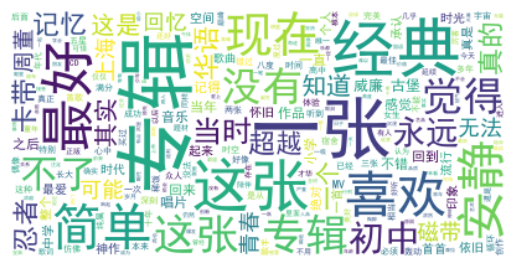

In [35]:
textall=''
for i in range(df_date.shape[0]):
    tmplist=split_text(text = df_date.iloc[i]['short'])
    for item in tmplist:
        textall+=item
        textall+=','

draw_wordcloud(text = textall) 

In [36]:
from snownlp import SnowNLP

# 定义情感分类函数
def get_sentiment(text):
    s = SnowNLP(text)
    sentiment = s.sentiments
    if sentiment > 0.5:
        return 'Positive'
    elif sentiment < 0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['short'].apply(get_sentiment)

rating_sentiment_counts = df.groupby(['star', 'sentiment']).size().unstack(fill_value=0)

print(rating_sentiment_counts)

sentiment  Negative  Neutral  Positive
star                                  
1.0               1        0         0
3.0               0        0         2
4.0              15        1        23
5.0              49        2       118


## It seems that this album has received too many positive reviews. Let's switch to an album with a more evenly distributed range of reviews.

In [37]:
file_path='./data/启示录.csv'
df = pd.read_csv(file_path)
df

,user_name,star,comment_time,vote,short
0,锐利修蕊,1.0,2023-01-15 11:55:05,146,......
1,DeerColin,4.0,2022-09-25 07:34:50,113,用【少年与海】打头太对了！cut：【少年与海】、【不想回家】、【冰河时代】、【Gloria】...
2,tlmgt,2.0,2022-09-23 15:15:52,198,拥有华语乐坛现役女歌手里稀缺的爆发力，她只要一直在线，市场还是会买单的。标题叫『启示录』大部...
3,郑宁素,4.0,2022-09-23 00:23:56,109,顺着听下来真的还不错啦。而且这个企划也挺有意思的，反正我跟着追了好久，关键问题是她的歌确实都不算k
4,内陆飞鱼,3.0,2023-11-11 22:04:35,1,邓紫棋离开LupoGroinig以后，歌没那么好听，制作也开始迷茫了……
...,...,...,...,...,...
215,dear fiona,4.0,2022-11-28 22:46:59,3,好几年没见，团队到本人都nice又专业，意外成为今年海滩边照亮我的漆黑夜晚的一道光。（地板上...
216,未央一梦,3.0,2023-02-03 10:27:17,0,无功无过，没有一首能拿得出手的。
217,豆友208712135,2.0,2022-09-21 20:52:18,1,还不错，编曲比摩天动物园强了很多
218,moon,NaN,2022-08-09 20:10:01,31,不会有任何听第二遍的欲望……


In [38]:
df_star = df.groupby(['star'])['star'].count()
df_star

star
1.0    22
2.0    44
3.0    76
4.0    50
5.0    18
Name: star, dtype: int64

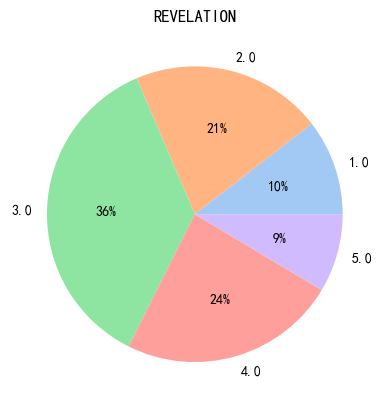

In [39]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_star, labels = df_star.index.tolist(), colors = colors, autopct='%.0f%%')
plt.title('REVELATION')
plt.show()

In [40]:
df_date = df.copy()
df_date['comment_time']=pd.to_datetime(df_date['comment_time']).dt.strftime('%Y')
month_count=df_date.groupby(['comment_time'])['comment_time'].count()
month_count.index

Index(['2022', '2023'], dtype='object', name='comment_time')

In [41]:
top10 = df.sort_values(by=['vote'],ascending=False).iloc[:10]
top10


,user_name,star,comment_time,vote,short
22,路过小卢,5.0,2022-08-09 13:28:04,406,虽然我对邓紫棋只是路人，但在当今这个追求碎片、流量、数字音乐的网络时代，一张专辑还能有完整1...
2,tlmgt,2.0,2022-09-23 15:15:52,198,拥有华语乐坛现役女歌手里稀缺的爆发力，她只要一直在线，市场还是会买单的。标题叫『启示录』大部...
9,矹矶,1.0,2022-08-26 23:35:14,194,折磨难受想哭
172,DTD,5.0,2022-08-09 12:18:48,185,果不其然，来了来了高级通讯录文艺逼来了。尖酸刻薄的能力确实比邓紫棋强。我是歌迷，先给四星，怕...
0,锐利修蕊,1.0,2023-01-15 11:55:05,146,......
92,球坐标系,5.0,2022-08-09 12:59:09,139,8.0/10邓紫棋生涯最佳。
23,藏吉田石,2.0,2022-08-11 14:40:13,131,哈哈哈
47,Atticaves,3.0,2022-08-09 13:00:16,120,之前真的很讨厌这姐觉得唱歌太油腻了这次居然不油腻了后半张逆风翻盘我骑感人
49,Fcckjiolin,1.0,2022-08-11 01:52:28,114,新歌不行，没有高潮，整体差一口劲儿，有点泄了的感觉。MV也是走来走去，干嘛呢？平静的走着走着...
1,DeerColin,4.0,2022-09-25 07:34:50,113,用【少年与海】打头太对了！cut：【少年与海】、【不想回家】、【冰河时代】、【Gloria】...


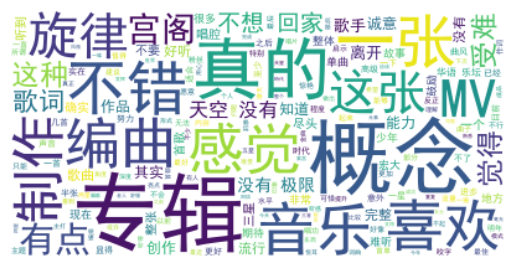

In [42]:
textall=''
for i in range(df_date.shape[0]):
    tmplist=split_text(text = df_date.iloc[i]['short'])
    for item in tmplist:
        textall+=item
        textall+=','

draw_wordcloud(text = textall) 

In [43]:
def get_sentiment(text):
    s = SnowNLP(text)
    sentiment = s.sentiments
    if sentiment > 0.7:
        return 'Positive'
    elif sentiment < 0.3:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['short'].apply(get_sentiment)

rating_sentiment_counts = df.groupby(['star', 'sentiment']).size().unstack(fill_value=0)

print(rating_sentiment_counts) 

sentiment  Negative  Neutral  Positive
star                                  
1.0               3        7        12
2.0              11       15        18
3.0               9       16        51
4.0               3        5        42
5.0               0        2        16


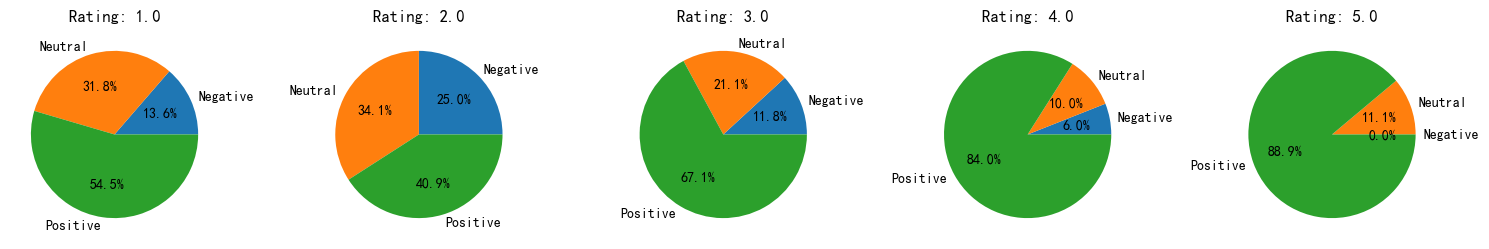

In [44]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, rating in enumerate(rating_sentiment_counts.index):
    ax = axs[i]
    ax.pie(rating_sentiment_counts.loc[rating], labels=rating_sentiment_counts.columns, autopct='%1.1f%%')
    ax.set_title(f'Rating: {rating}')

plt.tight_layout()

plt.show()